#### Pandas Rolling Window Functions and GroupBy - Part 87

This notebook covers advanced rolling window functions like `kurt()` and `apply()`, as well as the basics of GroupBy objects and their methods.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

##### Rolling Window Functions

### Rolling.kurt() - Rolling Kurtosis

The `kurt()` method calculates the unbiased rolling kurtosis using Fisher's definition without bias.

In [2]:
# Create a sample series
arr = [1, 2, 3, 4, 999]
s = pd.Series(arr)
print("Series:")
print(s)

Series:
0      1
1      2
2      3
3      4
4    999
dtype: int64


In [3]:
# Calculate rolling kurtosis with window size 4
rolling_kurt = s.rolling(4).kurt()
print("\nRolling kurtosis with window size 4:")
print(rolling_kurt)


Rolling kurtosis with window size 4:
0         NaN
1         NaN
2         NaN
3   -1.200000
4    3.999946
dtype: float64


In [4]:
# Compare with scipy.stats.kurtosis
print(f"\nSciPy kurtosis for first 4 values: {scipy.stats.kurtosis(arr[:-1], bias=False):.6f}")
print(f"SciPy kurtosis for last 4 values: {scipy.stats.kurtosis(arr[1:], bias=False):.6f}")


SciPy kurtosis for first 4 values: -1.200000
SciPy kurtosis for last 4 values: 3.999946


### Rolling.apply() - Custom Rolling Window Function

The `apply()` method allows you to apply a custom function to each window of data.

In [5]:
# Create a sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1]
})
print("DataFrame:")
print(df)

DataFrame:
   A  B
0  1  5
1  2  4
2  3  3
3  4  2
4  5  1


In [6]:
# Define a custom function to calculate the range (max - min) of each window
def window_range(x):
    return x.max() - x.min()

# Apply the custom function to each window
rolling_range = df.rolling(window=3).apply(window_range)
print("\nRolling range with window size 3:")
print(rolling_range)


Rolling range with window size 3:
     A    B
0  NaN  NaN
1  NaN  NaN
2  2.0  2.0
3  2.0  2.0
4  2.0  2.0


In [7]:
# Using raw=True for better performance with NumPy functions
def numpy_range(x):
    return np.max(x) - np.min(x)

rolling_range_raw = df.rolling(window=3).apply(numpy_range, raw=True)
print("\nRolling range with window size 3 using raw=True:")
print(rolling_range_raw)


Rolling range with window size 3 using raw=True:
     A    B
0  NaN  NaN
1  NaN  NaN
2  2.0  2.0
3  2.0  2.0
4  2.0  2.0


### Rolling.aggregate() - Multiple Aggregations

The `aggregate()` (or `agg()`) method allows you to apply multiple aggregation functions to each window.

In [8]:
# Apply multiple aggregation functions
rolling_agg = df.rolling(window=3).agg(['mean', 'std', 'min', 'max'])
print("Rolling aggregation with window size 3:")
print(rolling_agg)

Rolling aggregation with window size 3:
     A                   B               
  mean  std  min  max mean  std  min  max
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  2.0  1.0  1.0  3.0  4.0  1.0  3.0  5.0
3  3.0  1.0  2.0  4.0  3.0  1.0  2.0  4.0
4  4.0  1.0  3.0  5.0  2.0  1.0  1.0  3.0


In [9]:
# Apply different functions to different columns
rolling_agg_dict = df.rolling(window=3).agg({
    'A': ['mean', 'max'],
    'B': ['min', 'std']
})
print("\nRolling aggregation with different functions per column:")
print(rolling_agg_dict)


Rolling aggregation with different functions per column:
     A         B     
  mean  max  min  std
0  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN
2  2.0  3.0  3.0  1.0
3  3.0  4.0  2.0  1.0
4  4.0  5.0  1.0  1.0


##### Custom Window Indexer

Pandas provides the `BaseIndexer` class for defining custom window boundaries.

In [14]:
import pandas as pd
import numpy as np

# Create a Series
s = pd.Series(range(10))
print("Original Series:")
print(s)

# Create variable window means manually
variable_window_means = []
for i in range(len(s)):
    # Window size increases with index: window size = index + 1
    window_size = i + 1
    window_values = s.iloc[max(0, i - window_size + 1):i + 1]
    variable_window_means.append(window_values.mean())

variable_window_result = pd.Series(variable_window_means, index=s.index)
print("\nVariable window mean (manual calculation):")
print(variable_window_result)

# Alternative: Use expanding window
expanding_mean = s.expanding().mean()
print("\nExpanding window mean (built-in):")
print(expanding_mean)

# Create a custom variable window calculation
# For example, window size = 2*i + 1 (centered window that grows with index)
custom_window_means = []
for i in range(len(s)):
    window_size = min(2*i + 1, len(s))
    start = max(0, i - window_size//2)
    end = min(len(s), start + window_size)
    window_values = s.iloc[start:end]
    custom_window_means.append(window_values.mean())

custom_window_result = pd.Series(custom_window_means, index=s.index)
print("\nCustom variable window mean:")
print(custom_window_result)

Original Series:
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

Variable window mean (manual calculation):
0    0.0
1    0.5
2    1.0
3    1.5
4    2.0
5    2.5
6    3.0
7    3.5
8    4.0
9    4.5
dtype: float64

Expanding window mean (built-in):
0    0.0
1    0.5
2    1.0
3    1.5
4    2.0
5    2.5
6    3.0
7    3.5
8    4.0
9    4.5
dtype: float64

Custom variable window mean:
0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    4.5
6    5.0
7    5.5
8    6.0
9    6.5
dtype: float64


In [11]:
# Create a sample series
s = pd.Series([1, 2, 3, 4, 5])
print("Series:")
print(s)

Series:
0    1
1    2
2    3
3    4
4    5
dtype: int64


##### GroupBy Objects

GroupBy objects are returned by `groupby()` calls and provide methods for aggregating and transforming data by groups.

In [16]:
# Create a sample DataFrame
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two'],
    'C': [1, 2, 3, 4, 5, 6],
    'D': [10, 20, 30, 40, 50, 60]
})
print("DataFrame:")
print(df)

DataFrame:
     A      B  C   D
0  foo    one  1  10
1  bar    one  2  20
2  foo    two  3  30
3  bar  three  4  40
4  foo    two  5  50
5  bar    two  6  60


In [17]:
# Group by column 'A'
grouped = df.groupby('A')
print("\nGrouped by column 'A':")
print(grouped)


Grouped by column 'A':


### GroupBy.__iter__() - Iterating Over Groups

The `__iter__()` method allows you to iterate over each group in a GroupBy object.

In [18]:
# Iterate over groups
print("Iterating over groups:")
for name, group in grouped:
    print(f"\nGroup name: {name}")
    print(group)

Iterating over groups:

Group name: bar
     A      B  C   D
1  bar    one  2  20
3  bar  three  4  40
5  bar    two  6  60

Group name: foo
     A    B  C   D
0  foo  one  1  10
2  foo  two  3  30
4  foo  two  5  50


### GroupBy.groups - Group Labels

The `groups` property returns a dictionary mapping group names to group labels.

In [19]:
# Get group labels
print("Group labels:")
print(grouped.groups)

Group labels:
{'bar': [1, 3, 5], 'foo': [0, 2, 4]}


### GroupBy.indices - Group Indices

The `indices` property returns a dictionary mapping group names to group indices.

In [20]:
# Get group indices
print("Group indices:")
print(grouped.indices)

Group indices:
{'bar': array([1, 3, 5]), 'foo': array([0, 2, 4])}


### GroupBy.get_group() - Get a Specific Group

The `get_group()` method allows you to retrieve a specific group by its name.

In [21]:
# Get a specific group
foo_group = grouped.get_group('foo')
print("Group 'foo':")
print(foo_group)

Group 'foo':
     A    B  C   D
0  foo  one  1  10
2  foo  two  3  30
4  foo  two  5  50


### Groupby with Multiple Columns

In [22]:
# Group by multiple columns
multi_grouped = df.groupby(['A', 'B'])
print("Grouped by columns 'A' and 'B':")
print(multi_grouped.groups)

Grouped by columns 'A' and 'B':
{('bar', 'one'): [1], ('bar', 'three'): [3], ('bar', 'two'): [5], ('foo', 'one'): [0], ('foo', 'two'): [2, 4]}


In [23]:
# Get a specific group from multi-level groupby
foo_one_group = multi_grouped.get_group(('foo', 'one'))
print("\nGroup ('foo', 'one'):")
print(foo_one_group)


Group ('foo', 'one'):
     A    B  C   D
0  foo  one  1  10


### Using Grouper for Time-Based Grouping

In [24]:
# Create a DataFrame with date index
dates = pd.date_range('2023-01-01', periods=10)
df_dates = pd.DataFrame({
    'A': np.random.randn(10),
    'B': np.random.randn(10)
}, index=dates)
print("DataFrame with date index:")
print(df_dates)

DataFrame with date index:
                   A         B
2023-01-01  0.586904  0.184969
2023-01-02 -0.693773 -0.320836
2023-01-03  0.707814 -1.138140
2023-01-04  0.283349 -1.001564
2023-01-05 -0.684784 -2.687766
2023-01-06 -0.050595 -0.382989
2023-01-07 -0.415895  0.334467
2023-01-08  1.645673  0.296072
2023-01-09  0.740126  0.778631
2023-01-10  1.085102 -0.418603


In [25]:
# Group by month using Grouper
monthly_grouped = df_dates.groupby(pd.Grouper(freq='M'))
print("\nMonthly groups:")
for name, group in monthly_grouped:
    print(f"\nMonth: {name}")
    print(group)


Monthly groups:

Month: 2023-01-31 00:00:00
                   A         B
2023-01-01  0.586904  0.184969
2023-01-02 -0.693773 -0.320836
2023-01-03  0.707814 -1.138140
2023-01-04  0.283349 -1.001564
2023-01-05 -0.684784 -2.687766
2023-01-06 -0.050595 -0.382989
2023-01-07 -0.415895  0.334467
2023-01-08  1.645673  0.296072
2023-01-09  0.740126  0.778631
2023-01-10  1.085102 -0.418603


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_92084/1158123330.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_grouped = df_dates.groupby(pd.Grouper(freq='M'))


In [26]:
# Calculate monthly statistics
monthly_stats = monthly_grouped.agg(['mean', 'std', 'min', 'max'])
print("\nMonthly statistics:")
print(monthly_stats)


Monthly statistics:
                   A                                      B           \
                mean      std       min       max      mean      std   
2023-01-31  0.320392  0.77878 -0.693773  1.645673 -0.435576  0.99388   

                                
                 min       max  
2023-01-31 -2.687766  0.778631  


### Practical Example: Sales Data Analysis

In [27]:
# Create a sample sales DataFrame
sales_data = pd.DataFrame({
    'date': pd.date_range('2023-01-01', periods=20),
    'product': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'region': ['East', 'East', 'West', 'West', 'East', 'East', 'West', 'West', 'East', 'East', 
               'West', 'West', 'East', 'East', 'West', 'West', 'East', 'East', 'West', 'West'],
    'sales': np.random.randint(100, 1000, 20),
    'quantity': np.random.randint(1, 10, 20)
})
print("Sales data:")
print(sales_data.head())

Sales data:
        date product region  sales  quantity
0 2023-01-01       A   East    108         8
1 2023-01-02       B   East    704         9
2 2023-01-03       A   West    350         5
3 2023-01-04       B   West    815         1
4 2023-01-05       A   East    115         5


In [28]:
# Group by product and region
product_region_grouped = sales_data.groupby(['product', 'region'])

# Calculate total sales and average quantity by product and region
sales_summary = product_region_grouped.agg({
    'sales': 'sum',
    'quantity': 'mean'
})
print("\nSales summary by product and region:")
print(sales_summary)


Sales summary by product and region:
                sales  quantity
product region                 
A       East     1833       6.2
        West     2064       3.6
B       East     2801       5.2
        West     2512       3.6


In [29]:
# Group by date (weekly) and product
weekly_product_grouped = sales_data.groupby([pd.Grouper(key='date', freq='W'), 'product'])

# Calculate weekly sales by product
weekly_sales = weekly_product_grouped['sales'].sum().unstack()
print("\nWeekly sales by product:")
print(weekly_sales)


Weekly sales by product:
product          A       B
date                      
2023-01-01   108.0     NaN
2023-01-08   567.0  2415.0
2023-01-15  1511.0  1287.0
2023-01-22  1711.0  1611.0


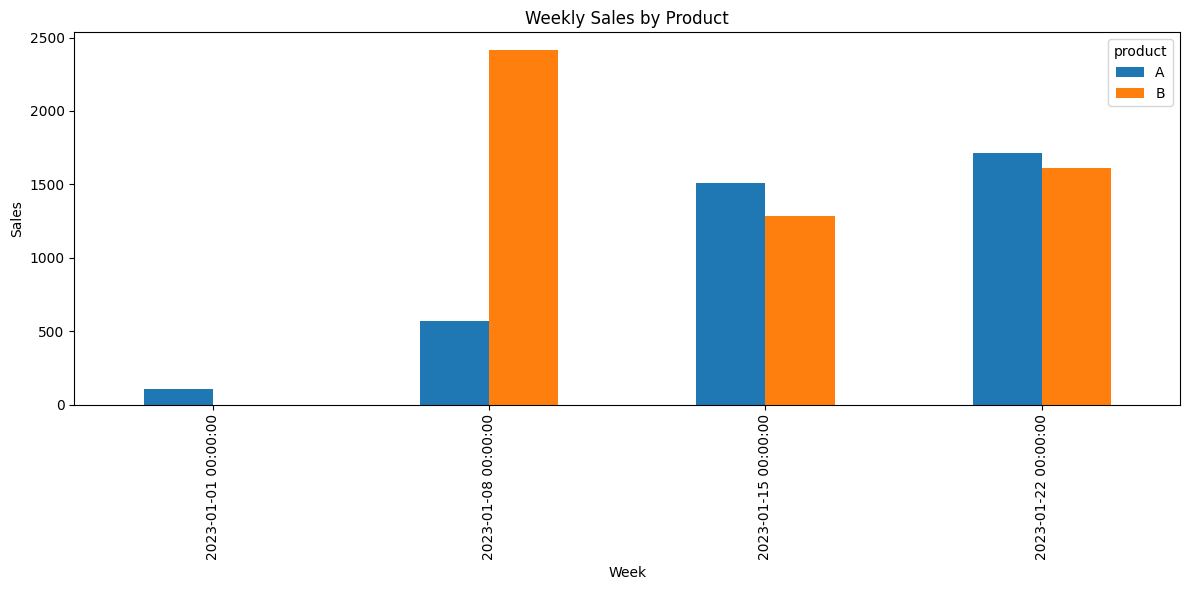

In [30]:
# Visualize weekly sales by product
import matplotlib.pyplot as plt

weekly_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Weekly Sales by Product')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()